<a href="https://colab.research.google.com/github/Ahadri94/BW2-Hotel-booking-demand-Project/blob/master/DS19_Build_week_2_Ahmed_hadri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing 

In [52]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


In [53]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/Ahadri94/BW2-Hotel-booking-demand-Project/master/hotel_bookings.csv'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [54]:
Hotel_booking_demand = pd.read_csv('https://raw.githubusercontent.com/Ahadri94/BW2-Hotel-booking-demand-Project/master/hotel_bookings.csv')

print(Hotel_booking_demand.shape)
Hotel_booking_demand.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# EDA

In [55]:
#Identifying the NaN's value 

Hotel_booking_demand.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [56]:
Hotel_booking_demand.is_canceled.unique()

array([0, 1])

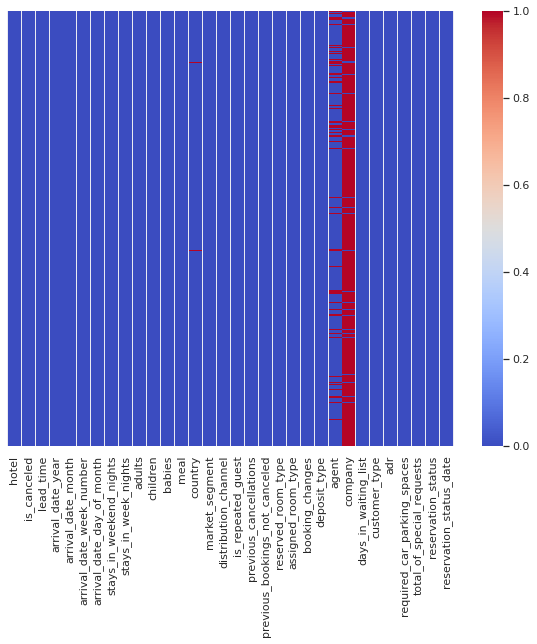

In [57]:
sns.heatmap(Hotel_booking_demand.isnull(),yticklabels=False,cbar='False',cmap='coolwarm')

In [58]:
Hotel_booking_demand['children'] = Hotel_booking_demand['children'].fillna(Hotel_booking_demand['children'].median(), axis=0)

Hotel_booking_demand['country'] = Hotel_booking_demand['country'].fillna(Hotel_booking_demand['country'].mode().to_string())

In [59]:
# Drop a column that might not be useful
Hotel_booking_demand.drop('agent',axis=1,inplace=True)
Hotel_booking_demand.drop('company',axis=1,inplace=True)

In [60]:
Hotel_booking_demand.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [61]:
Hotel_booking_demand.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [62]:
Hotel_booking_demand.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [63]:
Hotel_booking_demand.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [64]:
df_hot_obj = [ 'hotel','stays_in_week_nights','adults','children','babies','distribution_channel','is_repeated_guest',
'previous_bookings_not_canceled','assigned_room_type','customer_type','adr','required_car_parking_spaces'
, 'arrival_date_month','meal','country','market_segment','reserved_room_type','reserved_room_type','reservation_status',
             'reservation_status_date','deposit_type','reserved_room_type','reserved_room_type'
             ,'reserved_room_type']
Hotel_booking_demand [ df_hot_obj]= Hotel_booking_demand [ df_hot_obj].astype('category')

In [65]:
# Drop a column that might not be useful

Hotel_booking_demand.drop('reservation_status',axis=1,inplace=True)

In [66]:
Hotel_booking_demand = Hotel_booking_demand.replace({"?": np.NaN})

In [67]:
data = Hotel_booking_demand.copy()

In [68]:
Hotel_booking_demand.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03


In [69]:
# Change column type from object to int

Hotel_booking_demand['adr'] = Hotel_booking_demand['adr'].astype(int)
Hotel_booking_demand['children'] = Hotel_booking_demand['children'].astype(int)

In [70]:
 # Set (column reservation_status_date) to Datetime 
 
 Hotel_booking_demand['reservation_status_date'] = pd.to_datetime(Hotel_booking_demand['reservation_status_date'], infer_datetime_format=True)

In [71]:
# Set (column reservation_status_date) from object to int

Hotel_booking_demand['reservation_status_date_year'] = Hotel_booking_demand['reservation_status_date'].dt.year
Hotel_booking_demand['reservation_status_date_month'] = Hotel_booking_demand['reservation_status_date'].dt.month
Hotel_booking_demand['reservation_status_date_day'] = Hotel_booking_demand['reservation_status_date'].dt.day

Hotel_booking_demand = Hotel_booking_demand.drop(columns='reservation_status_date')

In [72]:
#Looks like there are some reservation with 0 adults, we need to take a look at those records.
len(Hotel_booking_demand[(Hotel_booking_demand['adults']==0) & (Hotel_booking_demand['children']==0) & (Hotel_booking_demand['babies']==0)])

zero_guests = Hotel_booking_demand[(Hotel_booking_demand['adults']==0) & (Hotel_booking_demand['children']==0) & (Hotel_booking_demand['babies']==0)].index
Hotel_booking_demand.drop(zero_guests, inplace=True)
Hotel_booking_demand.shape

(119210, 31)

In [73]:
categorical_val = Hotel_booking_demand.select_dtypes(exclude=["number"])

In [74]:
len(categorical_val['arrival_date_month'].value_counts())

12

In [75]:
  # Identify and drop high-cardinality columns
  unique_cats = Hotel_booking_demand.select_dtypes('object').nunique()
  high_card_cols = [col for col in unique_cats.index if unique_cats[col] > 15]
  Hotel_booking_demand = Hotel_booking_demand.drop(high_card_cols, axis=1)

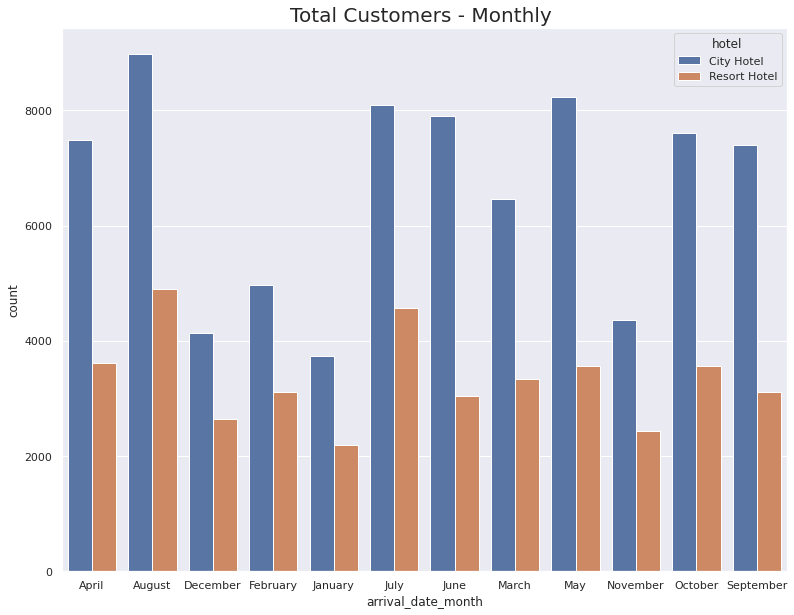

In [76]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)

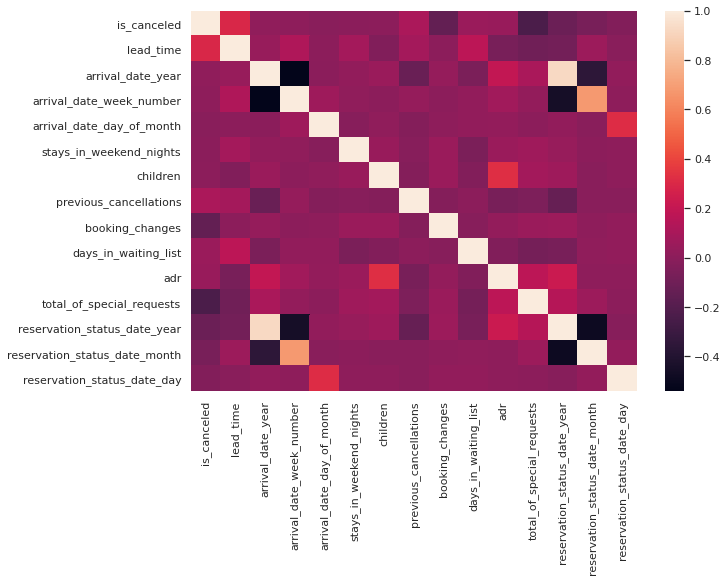

In [77]:
fig,axes = plt.subplots(1,1,figsize=(10,7))
sns.heatmap(Hotel_booking_demand.corr())
plt.show()

In [78]:
Hotel_booking_demand.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date_year', 'reservation_status_date_month',
       'reservation_status_date_day'],
      dtype='object')

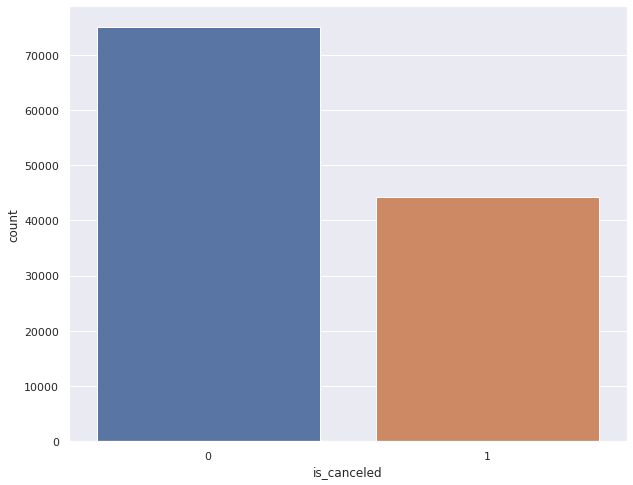

In [79]:
sns.countplot(x='is_canceled', data=Hotel_booking_demand)

In [80]:
Hotel_booking_demand.select_dtypes('object').nunique().sort_values(ascending=False).head(10)

reserved_room_type    9
dtype: int64

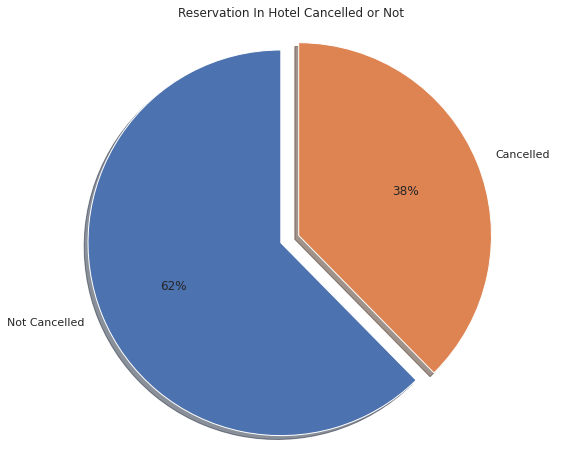

In [81]:
plt.rcParams['figure.figsize'] = (10,8)
labels = 'Not Cancelled', 'Cancelled'
sizes = [63,38]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.0f%%',
        shadow=True, startangle=90,center=(0, 0))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Reservation In Hotel Cancelled or Not')
plt.show()

In [82]:
print('There are ' + str(len(Hotel_booking_demand[(Hotel_booking_demand['hotel']=='Resort Hotel') & (Hotel_booking_demand['is_canceled']==1)])) + ' cancelations at Resort Hotel')
print('There are ' + str(len(Hotel_booking_demand[(Hotel_booking_demand['hotel']=='City Hotel') & (Hotel_booking_demand['is_canceled']==1)])) + ' cancelations at City Hotel')

There are 11120 cancelations at Resort Hotel
There are 33079 cancelations at City Hotel


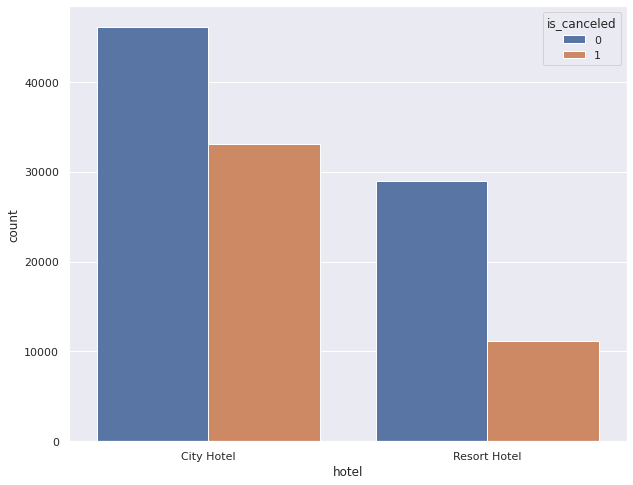

In [83]:
sns.countplot(x='hotel',hue='is_canceled',data=Hotel_booking_demand)

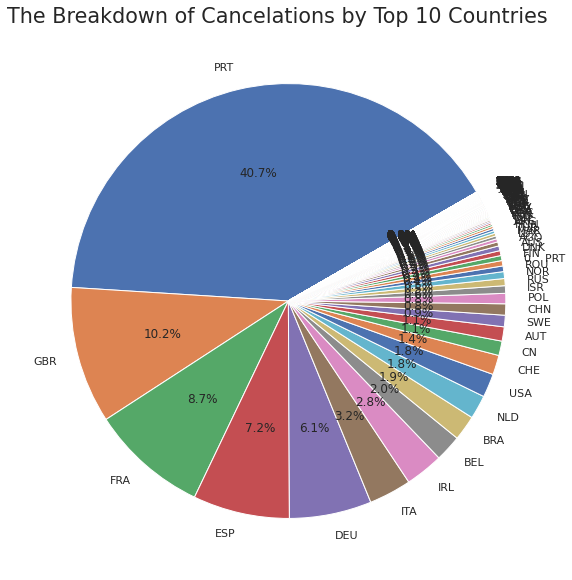

In [84]:
fig = plt.figure(figsize = (20,10))
labels = Hotel_booking_demand['country'].value_counts().index.tolist()
sizes = Hotel_booking_demand['country'].value_counts().tolist()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = False, startangle = 30)
plt.title('The Breakdown of Cancelations by Top 10 Countries', fontdict=None, position= [0.48,1], size = 'xx-large')
plt.show()

# Splitting Data 

### Split our dataset into TRANINING & VALIDATION sets

In [147]:
# Changing the dataset into dependent and independent variables
X = Hotel_booking_demand.drop(['is_canceled'], axis = 1)[numerical_features + categorical_features]
y = Hotel_booking_demand['is_canceled']


# Making the numerical features and categorical features for one-hot encoding and simple imputing
numerical_features = list(Hotel_booking_demand.select_dtypes(exclude = [object]))
categorical_features = list(Hotel_booking_demand.select_dtypes(include = [object]))
numerical_features.remove('is_canceled')


In [86]:
X.shape

(119210, 30)

In [87]:
y.shape

(119210,)

In [88]:
X_val.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day,reserved_room_type
115413,City Hotel,405,2017,July,27,4,0,2,2,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,0,No Deposit,0,Transient-Party,114,0,0,2017,7,6,A
110385,City Hotel,74,2017,April,17,23,2,2,2,1,0,BB,FRA,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,144,0,2,2017,4,27,A
59474,City Hotel,247,2016,October,44,28,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,0,Non Refund,0,Transient,110,0,0,2016,3,15,A
67300,City Hotel,157,2017,May,18,1,1,3,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,0,Non Refund,0,Transient,130,0,0,2016,11,25,A
88836,City Hotel,3,2017,January,1,5,0,1,2,0,0,SC,PRT,Online TA,TA/TO,1,0,7,A,0,No Deposit,0,Transient,88,0,1,2017,1,6,A


## Split feature matrix from target vector 

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Establishing a Baseline 

In [91]:
# Check is this a regression prob? or a classification prob?
# if it is a resgression, we will start with the mean 
from sklearn.metrics import mean_absolute_error 

y_pred = [y.mean()] * len(y)
print('Baseline MAE:', mean_absolute_error(y, y_pred))

Baseline MAE: 0.4665970820498433


# Building Model 

In [118]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

log_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['hotel', 'arrival_date_month',
                                      'stays_in_week_nights', 'adults',
                                      'babies', 'meal', 'country',
                                      'market_segment', 'distribution_channel',
                                      'is_repeated_guest',
                                      'previous_bookings_not_canceled',
                                      'assigned_room_type', 'deposit_type',
                                      'customer_type',
                                      'required_car_parking_spaces',
                                      'reserved_room_type']...
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=

# Check Our Metrics 

In [123]:
print('Training Accuracy:', log_model.score(X_train, y_train))
print('Validation Accuracy:', log_model.score(X_val, y_val))

Training Accuracy: 0.9482006543075245
Validation Accuracy: 0.9502139082291754


In [129]:
from sklearn.metrics import accuracy_score
# Step 3: Predict
y_pred_log = log_model.predict(X_val)
accuracy_score(y_val, y_pred)

0.9580991527556413

# Ensemble Methods: Random Forests

In [108]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder

In [126]:
forest_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=42) # <-- This is where the FI live
)

forest_model.fit(X_train, y_train);

In [127]:
print('Training Accuracy:', forest_model.score(X_train, y_train))
print('Validation Accuracy:', forest_model.score(X_val, y_val))

Training Accuracy: 0.9999895143024914
Validation Accuracy: 0.9580991527556413


In [130]:

y_pred_forest = forest_model.predict(X_val)
accuracy_score(y_val, y_pred)

0.9580991527556413

# And finally... Feature Importance

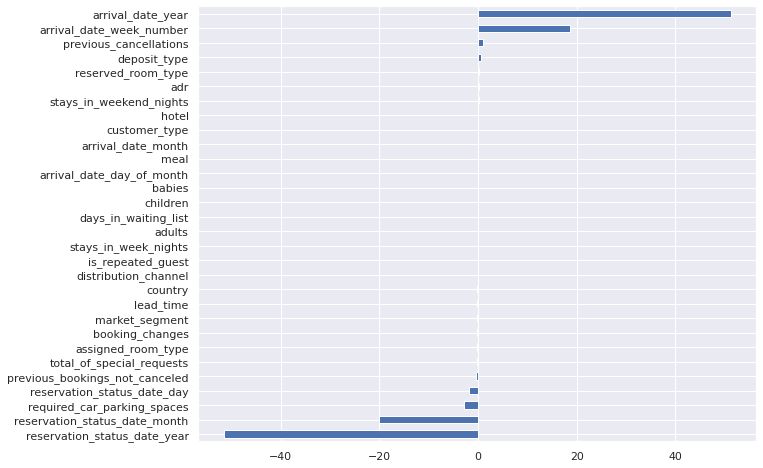

In [112]:
# Logistic Regression
pd.Series(log_model.named_steps['logisticregression'].coef_[0], index=X_train.columns).sort_values().plot(kind='barh')

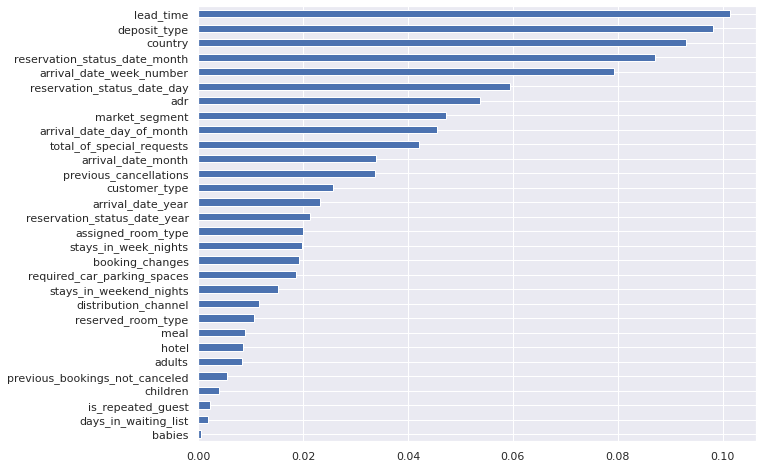

In [113]:
# Random Forest
feat_imp = forest_model.named_steps['randomforestclassifier'].feature_importances_

pd.Series(feat_imp, index=X_train.columns).sort_values().plot(kind='barh')

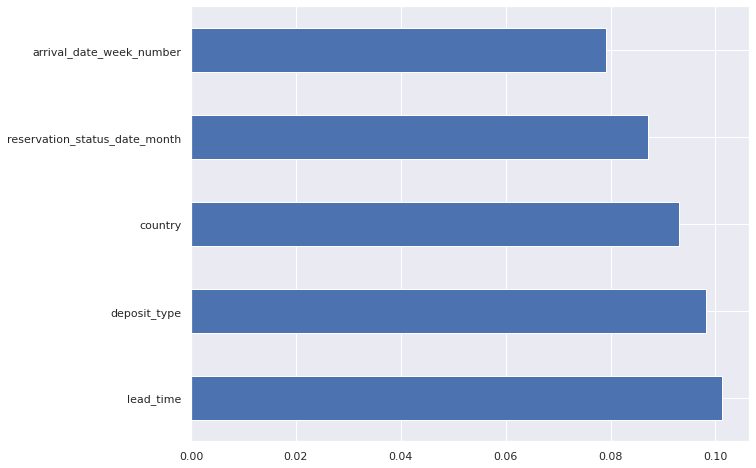

In [114]:
# Get the classifier from the pipeline
classifier = forest_model.named_steps['randomforestclassifier']

# Get the feature importance from the classifier
feat_imp = classifier.feature_importances_

# Use pandas Series to combine feat importances and names
feat_imp_s = pd.Series(feat_imp, index=X_train.columns).sort_values(ascending=False)

# Make the plot
feat_imp_s.head(5).plot(kind='barh')

In [115]:
feat_imp_s

lead_time                         0.101327
deposit_type                      0.098133
country                           0.093089
reservation_status_date_month     0.087092
arrival_date_week_number          0.079224
reservation_status_date_day       0.059439
adr                               0.053694
market_segment                    0.047189
arrival_date_day_of_month         0.045460
total_of_special_requests         0.042149
arrival_date_month                0.033976
previous_cancellations            0.033661
customer_type                     0.025769
arrival_date_year                 0.023258
reservation_status_date_year      0.021364
assigned_room_type                0.019950
stays_in_week_nights              0.019880
booking_changes                   0.019309
required_car_parking_spaces       0.018697
stays_in_weekend_nights           0.015252
distribution_channel              0.011594
reserved_room_type                0.010706
meal                              0.008946
hotel      

In [116]:
feat_imp

array([0.00854782, 0.10132742, 0.02325832, 0.03397647, 0.0792243 ,
       0.04545967, 0.01525181, 0.01987969, 0.00836816, 0.00399227,
       0.00052753, 0.00894604, 0.09308889, 0.04718903, 0.0115937 ,
       0.00215475, 0.03366091, 0.00542578, 0.01994957, 0.01930939,
       0.09813318, 0.00182563, 0.02576885, 0.05369417, 0.01869678,
       0.04214877, 0.02136395, 0.08709191, 0.05943938, 0.01070588])